### 목표 : 생선 품종 분류 모델
- 데이터 : fish.csv
- 피  처 : weight, length
- 타  겟 : Species
- 기계학습 : 지도학습 + 분류 (도미, 빙어 분류 ===> 이진 분류 )

(1) 모듈 로딩 및 데이터 준비
<hr>

In [4]:
#데이터분석 모듈 로딩
import pandas as pd

In [5]:
# 데이터 파일 설정
data_file = 'fish.csv'

In [6]:
#
fishDF = pd.read_csv(data_file, usecols=['Species', 'Weight', 'Length'])

# 기본 정보 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


(2) 데이터 전처리
- 결측치, 중복데이터, 이상치 확인

In [7]:
# 컬럼별 고유값으로 이상치 확인 => unique()
print(fishDF['Species'].unique)
print(fishDF['Weight'].unique)
print(fishDF['Length'].unique)

<bound method Series.unique of 0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object>
<bound method Series.unique of 0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64>
<bound method Series.unique of 0      25.4
1      26.3
2      26.5
3      29.0
4      29.0
       ... 
154    12.2
155    12.4
156    13.0
157    14.3
158    15.0
Name: Length, Length: 159, dtype: float64>


In [8]:
# 결측치 체크 => isna(), isnull()
fishDF.isna().sum()

Species    0
Weight     0
Length     0
dtype: int64

In [9]:
# 중복데이터 체크 -> duplicated()
fishDF.duplicated().sum()

4

In [10]:
# 'Bream', 'Smelt' 두 가지 품종 데이터만 추출
mask = fishDF['Species'].isin(['Bream', 'Smelt'])


twoFishDF=fishDF[mask]

# 인덱스 리셋
# Scikit-learn에 저장 시 ndarray 타입으로 저장되면서 인덱스 정리.
twoFishDF = twoFishDF.reset_index(drop=True)

# 기본 정보 확인
twoFishDF.info()

# 인덱스 확인
twoFishDF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  49 non-null     object 
 1   Weight   49 non-null     float64
 2   Length   49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.3+ KB


,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


(3) 학습용 데이터 준비 => 피처 + 타겟 준비

In [11]:
feature = twoFishDF[twoFishDF.columns[1:]]
feature.head()

,Weight,Length
0,242.0,25.4
1,290.0,26.3
2,340.0,26.5
3,363.0,29.0
4,430.0,29.0


In [12]:
# 타겟 데이터 추출
target = twoFishDF['Species']
target.head()

# Bream => 0, Smelt = 1로 변환
target = target.replace({'Bream':0, 'Smelt':1}).copy()


# 데이터 확인
print(target.head(), target.tail(), sep='\n\n')

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

44    1
45    1
46    1
47    1
48    1
Name: Species, dtype: int64


(4) 학습 진행

    - 알고리즘 구현 인스턴스 생성 => 지도 학습 분류 알고리즘 중 선택 : KNN
    - 학습 진행 메서드 => fit()

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
# (4-1) KNN 인스턴스 생성
model = KNeighborsClassifier()
model

KNeighborsClassifier()

In [15]:
# (4-2) 학습 진행 fit(2D, 1D)
model.fit(feature, target)

KNeighborsClassifier()

In [16]:
# 학습 후 속성 확인 => 속성명 : 모델 파라미터 -> 모델 학습 후 생성 및 저장됨
print("classes_:", model.classes_)
print('feature_names_in_:', model.feature_names_in_)
print('n_feature_in_ :', model.n_features_in_)

classes_: [0 1]
feature_names_in_: ['Weight' 'Length']
n_feature_in_ : 2


(5) 학습 후 검사 즉 테스트 => 메서드 : score()
- 결괏값 : 0.0(0%) ~ 1.0(100%)
- 사용데이터 -> 학습에 사용되지 않은 데이터 ( ※ 사용한 데이터를 쓰면 1.0이 나옴.)

In [17]:
model.score(feature, target) # 1.0 만점

1.0

(6) 예측 즉 서비스에 모델 활용 시 사용 => 메서드:predict(), predict_proba() (predict()=> 결과만 줌.)
- 조건 : 학습 시 전달된 데이터와 동일한 형태의 데이터가 전달되어야 한다.

In [18]:
# [무게, 길이]
new_data = pd.DataFrame([[19.9, 15]], columns =model.feature_names_in_)

# 학습 시 제공된 데이터의 양식과 동일한 형태로 제공해야 함.

pred_y = model.predict(new_data)

pred_y

#pred_y = model.predict([[19.9, 15]]) # UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names warnings.warn(

array([1], dtype=int64)

In [19]:
# 예측 확률
model.predict_proba(new_data)


array([[0., 1.]])

In [20]:
# 데이터와 최근접 이웃 데이터 => kneighbors() 메서드
# 반환값 : 거리, 원소번호
dis, ind = model.kneighbors(new_data)
ind

#ndarray => list
ind.tolist()[0]

[48, 47, 45, 46, 44]

In [21]:
ind.flatten() # 2차원 배열을 1차원으로

array([48, 47, 45, 46, 44], dtype=int64)

In [22]:
#K개의 최근접 이웃 데이터만 저장
kneighborDF = feature.iloc[ind.tolist()[0]]
kneighborDF

,Weight,Length
48,19.9,15.0
47,19.7,14.3
45,13.4,12.4
46,12.2,13.0
44,12.2,12.2


In [23]:
feature.shape

(49, 2)

In [24]:
# Weight & Length 시각화
# (1) 모듈 불러오기
import matplotlib.pyplot as plt


<Axes: xlabel='Weight', ylabel='Length'>

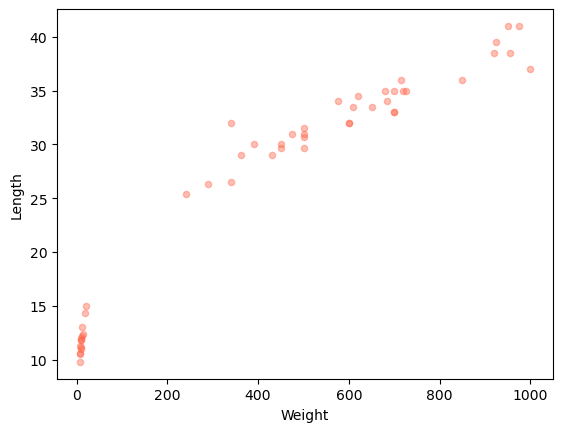

In [34]:
#pandas의 Series, DataFrame의 plot메서드
feature.plot.scatter(x = 'Weight', y = 'Length', color = 'tomato', alpha =0.4, legend='sad') #scatter로 그릴 때는 x, y 값을 지정해야함.
#feature.plot.scatter(new_data)

<Axes: title={'center': '[scatter]'}, xlabel='Weight', ylabel='Length'>

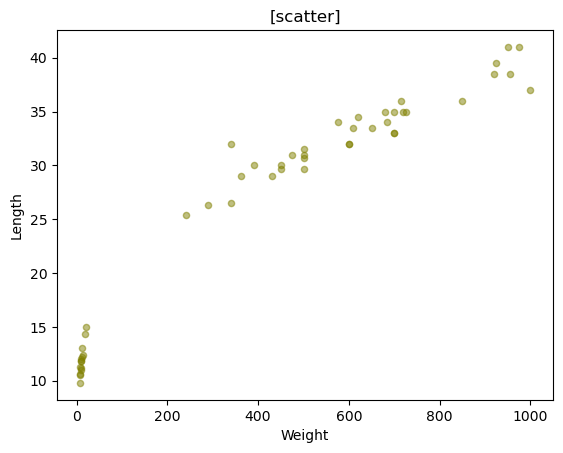

In [26]:
#feature.plot() # 기본 꺾은선 그래프
feature.plot(kind='scatter', title='[scatter]', x='Weight', y = 'Length', c='olive', alpha=0.5)

[확인] Weight & Length시각화

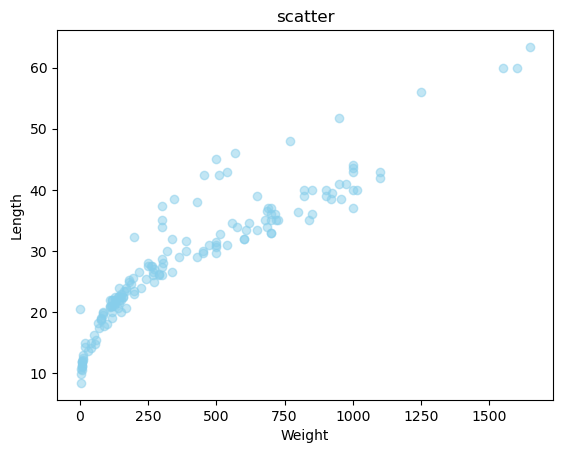

In [36]:
# 데이터 시각화
plt.title('scatter')
plt.scatter(fishDF['Weight'], fishDF['Length'], color = 'skyblue', alpha=0.5)
plt.xlabel('Weight')
plt.ylabel('Length')
plt.show()

(15, 19.9)

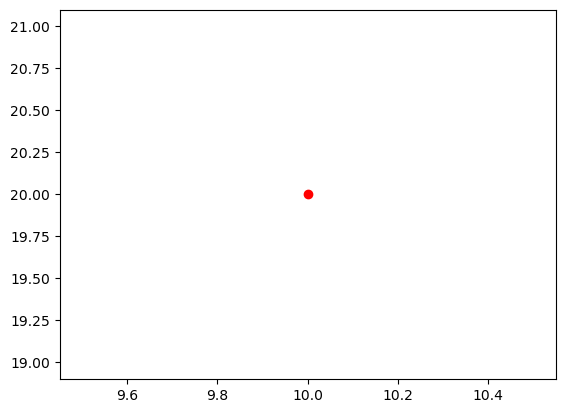

In [28]:
plt.plot(10, 20, 'ro')
new_data.Length.to_list()[0], new_data.Weight.to_list()[0]  # new_data.Length, new_data.Weight도 같음.  

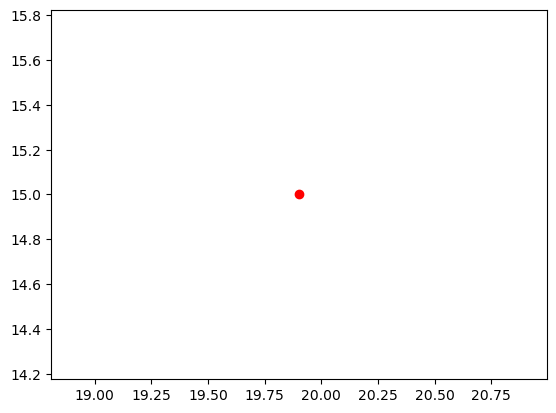

In [29]:
# 새로운 데이터 시각화
plt.plot(new_data.Weight[0], new_data.Length[0], 'ro')

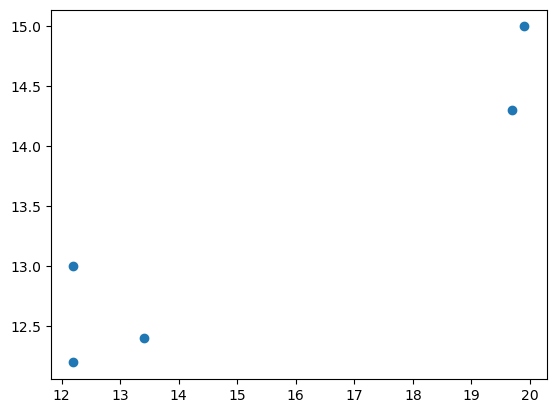

In [30]:
# 새로운 데이터의 K개 최근접 이웃 데이터 시각화
plt.scatter(x=kneighborDF.Weight, y = kneighborDF.Length)

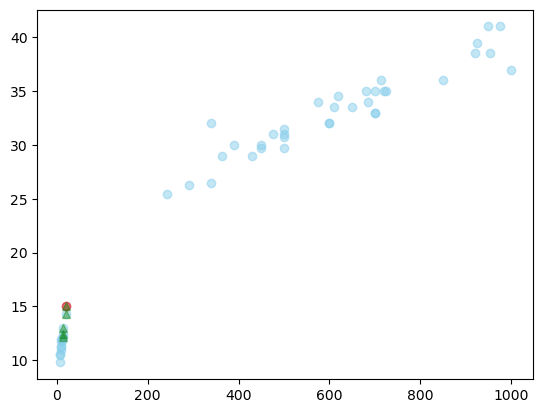

In [31]:
#
plt.scatter(x=feature.Weight, y=feature.Length, c = 'skyblue', alpha=0.5)
plt.plot(new_data.Weight[0], new_data.Length[0],'ro',alpha=0.5)
plt.plot(kneighborDF.Weight, kneighborDF.Length, 'g^', alpha=0.4)
plt.show()